# Chapter 3

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
# data prep
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

digits = datasets.load_digits()
X_train, X_valid, y_train, y_valid = train_test_split(digits.data, digits.target)

print(X_train.shape, X_valid.shape)
print(y_train.shape, y_valid.shape)

train_errs = []
valid_errs = []

C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

(1347, 64) (450, 64)
(1347,) (450,)


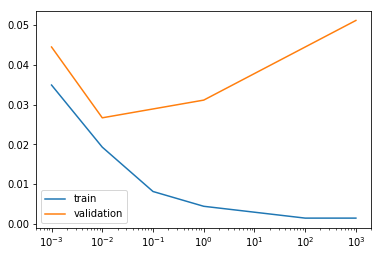

In [15]:
# Loop over values of C
for C_value in C_values:
    # Create LogisticRegression object and fit
    lr = LogisticRegression(C=C_value)
    lr.fit(X_train, y_train)
    
    # Evaluate error rates and append to lists
    train_errs.append( 1.0 - lr.score(X_train, y_train) )
    valid_errs.append( 1.0 - lr.score(X_valid, y_valid) )
    
# Plot results
plt.semilogx(C_values, train_errs, C_values, valid_errs)
plt.legend(("train", "validation"))
plt.show()

In [16]:
# data prep
from sklearn.model_selection import GridSearchCV

# cheating. Sticking with digit class

In [17]:
# Specify L1 regularization
lr = LogisticRegression(penalty='l1')

# Instantiate the GridSearchCV object and run the search
searcher = GridSearchCV(lr, {'C':[0.001, 0.01, 0.1, 1, 10]})
searcher.fit(X_train, y_train)

# Report the best parameters
print("Best CV params", searcher.best_params_)

# Find the number of nonzero coefficients (selected features)
best_lr = searcher.best_estimator_
coefs = best_lr.coef_
print("Total number of features:", coefs.size)
print("Number of selected features:", np.count_nonzero(coefs))

Best CV params {'C': 0.1}
Total number of features: 640
Number of selected features: 249


In [19]:
# Get the indices of the sorted cofficients
inds_ascending = np.argsort(best_lr.coef_.flatten()) 
inds_descending = inds_ascending[::-1]

# Print the most positive words
print("Most positive words: ", end="")
for i in range(5):
    print(inds_ascending[i], end=", ")
print("\n")

# Print most negative words
print("Most negative words: ", end="")
for i in range(5):
    print(inds_descending[i], end=", ")
print("\n")

Most positive words: 342, 550, 609, 619, 28, 

Most negative words: 597, 83, 426, 297, 84, 



In [ ]:
# actual code... will not run without MUCH faffing to get the word dataset to work...
# Get the indices of the sorted cofficients
inds_ascending = np.argsort(
    lr.coef_.flatten()) 
inds_descending = inds_ascending[::-1]

# Print the most positive words
print("Most positive words: ", end="")
for i in range(5):
    print(vocab[inds_descending[i]], end=", ")
print("\n")

# Print most negative words
print("Most negative words: ", end="")
for i in range(5):
    print(vocab[inds_ascending[i]], end=", ")
print("\n")

## Logistic Regression Probability

In [23]:
# data prep - this is a section of wine dataset
x0 = [ 1.78862847,  0.09649747, -0.2773882 , -3.08274148, -3.04381817,
       -1.31386475, -2.11868196, -2.94996636, -3.54535995,  0.98236743,
       -1.18504653, -1.51385164, -4.02378514,  0.62524497, -3.76883635,
        0.74505627, -1.24412333, -0.80376609, -0.92379202,  1.12397796]
x1 = [ 0.43650985, -1.8634927 , -0.35475898,  2.37299932,  2.52278197,
        0.88462238,  4.70957306,  2.59532259,  1.45352268, -1.10106763,
       -0.2056499 ,  3.23671627,  2.2870068 , -0.16051336,  2.76996928,
        1.97611078, -0.62641691, -2.41908317, -1.02387576, -0.13191423]
y0 = [-1, -1, -1,  1,  1, -1,  1,  1,  1, -1, -1,  1,  1, -1,  1, -1, -1,
       -1, -1, -1]

X = np.array(list(zip(x0, x1)))
y = np.array(y0)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def make_meshgrid(x, y, h=.02, lims=None):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """

    if lims is None:
        x_min, x_max = x.min() - 1, x.max() + 1
        y_min, y_max = y.min() - 1, y.max() + 1
    else:
        x_min, x_max, y_min, y_max = lims
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, proba=False, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    if proba:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,-1]
        Z = Z.reshape(xx.shape)
        out = ax.imshow(Z,extent=(np.min(xx), np.max(xx), np.min(yy), np.max(yy)), origin='lower', vmin=0, vmax=1, **params)
        ax.contour(xx, yy, Z, levels=[0.5])
    else:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        out = ax.contourf(xx, yy, Z, **params)
    return out


def plot_classifier(X, y, clf, ax=None, ticks=False, proba=False, lims=None): # assumes classifier "clf" is already fit
    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1, lims=lims)

    if ax is None:
        plt.figure()
        ax = plt.gca()
        show = True
    else:
        show = False

    # can abstract some of this into a higher-level function for learners to call
    cs = plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8, proba=proba)
    if proba:
        cbar = plt.colorbar(cs)
        cbar.ax.set_ylabel('probability of red $\Delta$ class', fontsize=20, rotation=270, labelpad=30)
        cbar.ax.tick_params(labelsize=14)
    #ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=30, edgecolors='k', linewidth=1)
    labels = np.unique(y)
    if len(labels) == 2:
        ax.scatter(X0[y==labels[0]], X1[y==labels[0]], cmap=plt.cm.coolwarm, s=60, c='b', marker='o', edgecolors='k')
        ax.scatter(X0[y==labels[1]], X1[y==labels[1]], cmap=plt.cm.coolwarm, s=60, c='r', marker='^', edgecolors='k')
    else:
        ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=50, edgecolors='k', linewidth=1)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
#     ax.set_xlabel(data.feature_names[0])
#     ax.set_ylabel(data.feature_names[1])
    if ticks:
        ax.set_xticks(())
        ax.set_yticks(())
#     ax.set_title(title)
    if show:
        plt.show()
    else:
        return ax


def plot_4_classifiers(X, y, clfs):

    # Set-up 2x2 grid for plotting.
    fig, sub = plt.subplots(2, 2)
    plt.subplots_adjust(wspace=0.2, hspace=0.2)

    for clf, ax, title in zip(clfs, sub.flatten(), ("(1)", "(2)", "(3)", "(4)")):
        # clf.fit(X, y)
        plot_classifier(X, y, clf, ax, ticks=True)
        ax.set_title(title)
    plt.show()

In [24]:
(X.shape, y.shape)

((20, 2), (20,))

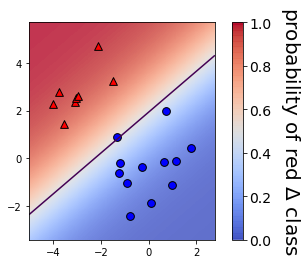

Maximum predicted probability 0.9761229967078282


In [26]:
# Set the regularization strength
model = LogisticRegression(C=1)

# Fit and plot
model.fit(X,y)
plot_classifier(X,y,model,proba=True)

# Predict probabilities on training points
prob = model.predict_proba(X)
print("Maximum predicted probability", prob.max())

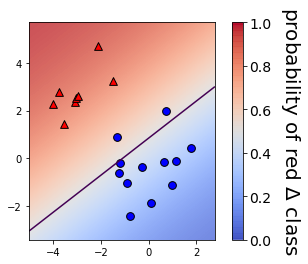

Maximum predicted probability 0.8990965658995651


In [28]:
# Set the regularization strength
model = LogisticRegression(C=0.1)

# Fit and plot
model.fit(X,y)
plot_classifier(X,y,model,proba=True)

# Predict probabilities on training points
prob = model.predict_proba(X)
print("Maximum predicted probability", prob.max())

In [30]:
# data prep
digits = datasets.load_digits()
X = digits.data
y = digits.target
X_train, X_valid, y_train, y_valid = train_test_split(digits.data, digits.target)

def show_digit(i, lr=None):
    plt.imshow(np.reshape(X[i], (8,8)), cmap='gray', vmin = 0, vmax = 16, interpolation=None)
    plt.xticks(())
    plt.yticks(())
    if lr is None:
        plt.title("class label = %d" % y[i])
    else:
        pred = lr.predict(X[i][None])
        pred_prob = lr.predict_proba(X[i][None])[0,pred]
        plt.title("label=%d, prediction=%d, proba=%.2f" % (y[i], pred, pred_prob))
    plt.show()

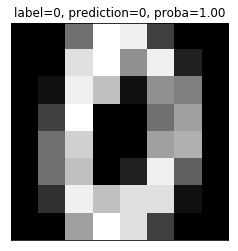

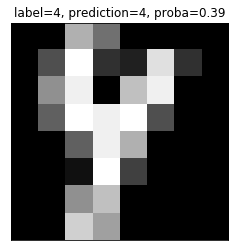

In [32]:
lr = LogisticRegression()
lr.fit(X,y)

# Get predicted probabilities
proba = lr.predict_proba(X)

# Sort the example indices by their maximum probability
proba_inds = np.argsort(np.max(proba,axis=1))

# Show the most confident (least ambiguous) digit
show_digit(proba_inds[-1], lr)

# Show the least confident (most ambiguous) digit
show_digit(proba_inds[0], lr)

## Multiclass Logistic Regression

In [35]:
# data prep
digits = datasets.load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)

In [37]:
# Fit one-vs-rest logistic regression classifier
lr_ovr = LogisticRegression()
lr_ovr.fit(X_train, y_train)

print("OVR training accuracy:", lr_ovr.score(X_train, y_train))
print("OVR test accuracy    :", lr_ovr.score(X_test, y_test))

# Fit softmax classifier
lr_mn = LogisticRegression(multi_class='multinomial', solver='lbfgs')
lr_mn.fit(X_train, y_train)

print("Softmax training accuracy:", lr_mn.score(X_train, y_train))
print("Softmax test accuracy    :", lr_mn.score(X_test, y_test))

OVR training accuracy: 0.9955456570155902
OVR test accuracy    : 0.9444444444444444
Softmax training accuracy: 1.0
Softmax test accuracy    : 0.9644444444444444


In [48]:
x0 = [-2.83895657e-01,  5.33624372e-01, -1.17337815e+00, -1.19338379e+00,
       -3.74902201e-01, -1.11678880e+00,  3.92567929e-02, -4.60496902e-01,
        3.73372234e-01, -5.68303256e-01, -8.10825377e-01, -2.23456895e-01,
        3.31395128e-01,  1.23187925e+00, -1.19438566e-01, -3.56432381e-01,
        3.68396844e-01, -2.55373639e-01, -1.32645347e+00, -5.92850474e-01,
        7.27961902e-01, -2.13511481e+00,  2.30542073e-01,  1.09813977e+00,
        8.38336530e-01,  4.86438237e-01,  7.86915440e-01, -4.78932579e-01,
       -2.03300554e-01,  3.39165831e-01, -3.61733276e-01,  1.18603363e+00,
       -4.87253757e-01, -1.88698497e-01,  9.81411621e-01,  1.50189299e+00,
       -6.44426536e-02,  1.28839740e+00, -9.02379254e-01, -2.75943790e-01,
        1.85875489e-04, -1.36218486e-01, -8.01189309e-01, -1.31114360e+00,
       -1.82715882e-01,  1.62577984e+00,  1.18754221e+00,  3.30896348e-01,
        1.06319463e+00, -6.31172777e-02,  3.70221639e-01, -3.14443989e-03,
        3.57484301e-01, -7.10889392e-01,  7.62329973e-01, -1.55233553e+00,
       -1.00339689e+00,  7.22823193e-01,  9.12755253e-02,  4.95114934e-02,
       -1.40309968e+00, -7.75501690e-01,  1.24435378e+00, -2.23130848e-02,
       -2.22779816e+00,  4.42928990e-02,  1.14098613e+00,  1.44165046e+00,
        1.32295140e-01,  3.69308441e-02, -6.12975983e-01,  8.22080441e-01,
       -1.03015455e+00, -1.27392825e+00, -4.22882508e-01,  1.05127378e+00,
       -7.89554501e-01,  3.73018740e-01, -7.21550677e-01,  1.91021707e+00,
        6.18671454e-01, -1.12104559e+00,  1.21061741e+00, -1.25680616e+00,
       -1.50756706e+00,  7.11133123e-01, -4.22620092e-01, -9.34751978e-01,
        1.21135650e+00, -1.15320171e+00,  2.62171741e+00, -1.48673284e-02,
       -4.71193685e-01,  2.19748594e+00,  8.95326539e-01, -6.17111080e-01,
        1.09948335e+00, -2.59602194e-01,  8.26861357e-01,  1.17328060e+00,
        9.44652675e-02,  7.93685036e-02,  8.55134983e-01, -3.33377592e-02,
        1.08195801e+00, -9.59114991e-01, -1.09944058e-01,  8.47500557e-01,
        8.97969301e-01, -7.45549265e-01, -2.35167941e-01,  3.82228847e-01,
        4.46548315e-01,  1.03125402e+00,  8.98533636e-01, -1.33555205e+00,
       -3.82730422e-01,  7.03771022e-02, -3.82547777e-01, -9.28831114e-01,
       -4.18020419e-01, -1.14297594e+00, -1.34085140e+00, -5.75321695e-01,
        1.05179314e+00, -2.41168156e-01,  1.46929860e+00,  2.39422640e-01,
        4.08505448e-01,  1.03080433e+00, -1.02676711e+00,  1.24298760e+00,
        9.98158704e-02, -3.30989273e-01,  1.46427195e-01,  6.27556539e-01,
        1.91133871e-01, -3.87055670e-01,  1.30466697e+00, -1.00664113e+00,
        2.04048554e-01, -1.30907152e+00,  3.40083444e-01,  2.13573178e-01,
       -2.36084944e-02,  9.22675071e-01, -8.85698364e-01, -1.55801959e+00,
        1.48191669e+00,  3.45873152e+00, -3.87080518e-01,  4.38763001e-01,
        6.72911640e-01,  8.93632281e-01, -6.90807494e-01, -4.15753108e-01,
        4.17739748e-01, -6.49536218e-01,  8.79936159e-01,  1.32963509e+00,
        1.67576848e+00, -1.00808260e+00,  1.53015384e+00, -6.18754318e-01,
       -8.71107452e-01,  6.37622987e-01, -3.10980526e-01, -6.45468284e-01,
        4.71158947e-01, -6.47038417e-01,  1.11893355e-01,  2.46226478e-01,
       -1.01089039e-01,  1.71659568e-01,  3.40480960e-01, -2.56618477e-01,
        1.53315515e+00, -5.31455590e-01,  1.39559634e+00, -2.21472479e-01,
       -4.96250861e-01,  6.16439064e-01, -3.12897613e+00, -6.99437789e-01,
        1.71519587e+00,  5.19186062e-01,  6.82204596e-01, -1.08581585e+00,
       -4.22907282e-01, -3.71555929e-01, -8.21577003e-01,  7.86870071e-02,
       -2.16193119e-01, -1.22548359e+00, -1.55000064e+00, -9.60286755e-01,
       -1.21420118e+00, -6.17941477e-01, -1.26821697e+00, -1.04121511e-01,
       -3.24089313e-01, -3.46051731e-01,  5.49168052e-01, -6.29554699e-02,
       -1.66552903e-01, -1.86519153e+00,  5.66593537e-02,  2.34711021e+00,
        6.42344993e-01,  8.19580983e-01, -1.27525615e+00,  4.18990622e-01,
       -6.45499218e-01,  5.87115685e-01, -1.38994421e+00,  1.33279793e+00,
       -1.14989342e+00, -4.78690715e-01,  1.54541507e+00,  7.28423987e-01,
       -1.07899557e+00,  1.73158536e+00, -8.50859191e-01,  6.85189932e-01,
        6.67027648e-01,  2.52037478e+00,  1.23372005e+00,  5.81184053e-02,
       -2.01775288e-01, -2.83241465e+00,  1.11794340e+00, -1.48414526e+00,
       -2.17997557e-01,  1.05131170e+00,  4.73478589e-01,  3.79073150e-01,
       -4.85248870e-01, -6.52513292e-01, -1.10638994e-01,  9.72278149e-01,
       -5.74704425e-01,  2.61211937e-01, -3.13766608e-01, -7.53824274e-01,
       -8.57537689e-01,  1.17612860e-01,  5.63697109e-01, -1.43600626e+00,
       -6.51804104e-01,  7.44253455e-01, -5.96343760e-01,  5.96500258e-01,
        9.46339546e-01, -9.49552255e-01,  7.77784328e-01, -2.14872339e-02,
        4.64142337e-01, -1.00162254e+00,  4.22650852e-01, -4.19091926e-01,
        3.80532136e-01, -6.88095193e-01, -1.38296737e+00, -1.56727614e-01,
       -7.02790559e-01,  4.53674228e-01, -3.70977024e-01,  9.95739869e-01,
        3.21633047e-01, -3.59761073e-01,  2.63949169e-01,  4.00202410e-01,
        8.54602127e-01,  1.17409647e-01, -2.96916269e+00,  8.98734164e-01,
        9.14885199e-01,  3.52225950e-01, -5.02642449e-01, -2.07926031e-01,
       -2.98067495e-01,  5.59552710e-01, -2.13331328e-01, -7.71592298e-01,
       -8.91009324e-02, -6.59158060e-01, -1.66256529e-01, -1.45293634e+00,
        2.58459533e-01, -6.16562642e-01,  1.99332380e+00,  1.31749904e+00,
        6.77627652e-01, -7.24054641e-01, -2.15908250e-01, -4.26627903e-01,
        1.13473732e+00,  1.56815803e+00,  7.86715120e-01,  9.87933166e-01,
        1.90729163e+00,  3.59355853e-01, -9.46647182e-01, -2.46689280e-01,
        2.67800451e-01, -1.83371684e+00, -7.32318763e-02,  6.97274340e-01,
        9.15469974e-02, -1.34215495e-01, -2.01959589e-01,  1.29536211e+00,
        6.35987451e-01, -7.52186057e-02, -7.38858807e-01,  2.76485783e+00,
       -8.28286409e-01,  6.72941893e-01,  3.56320956e-01, -1.83052452e-01,
        6.07162324e-01, -1.45724708e+00, -1.95713287e-02, -3.03595807e-01,
        4.25748084e-01,  1.28042925e+00,  1.13616284e+00, -5.15620443e-01,
        1.17568017e+00, -1.36411847e+00, -3.03338789e-01,  4.21265199e-01,
       -1.56356664e+00, -1.89370094e+00, -1.81369673e+00, -1.30487016e+00,
       -3.87350229e-01,  1.85116618e+00,  2.55609131e-01, -7.23423000e-01,
        7.19675853e-01,  4.07528586e-01,  1.27239160e+00, -7.33084811e-01,
       -1.00146686e+00,  8.74280306e-01, -2.60254075e+00,  2.47129653e-01,
       -1.32192531e+00, -1.50342772e+00,  1.31894693e+00,  1.07114856e+00,
       -9.48056016e-01, -1.47049629e+00, -1.52246111e+00,  6.62394356e-01,
       -1.77646954e+00, -1.33919576e+00,  4.55071208e-01, -9.27020245e-03,
        7.87715149e-01, -6.80287514e-01,  2.34664160e-01,  8.36586885e-03,
        1.87547736e+00, -3.47955037e-01, -7.67038989e-01,  2.63033753e-01,
        3.09943712e-02, -1.13433110e+00, -9.01631724e-02,  1.10103317e-01,
        1.49961133e+00, -1.18243595e+00, -1.15438675e+00, -1.96908372e+00,
        1.04567355e+00,  7.72705301e-01, -1.35997652e+00, -9.04834584e-01,
       -4.95178016e-01, -5.93938849e-01,  5.59304094e-01,  2.16040528e-01,
        1.91528001e-01,  1.10434170e+00, -1.09580513e+00,  6.32328497e-01,
        2.03614132e+00,  5.38816211e-01,  1.03704347e+00,  1.19372766e+00,
        1.51355134e+00, -1.07182512e+00, -4.77214399e-02, -7.41155815e-01,
       -5.26219209e-01, -1.72741909e+00,  6.08561524e-01,  2.68417609e-01,
        3.35639118e+00,  7.24257981e-01,  1.06875286e-01, -2.17547662e+00,
        7.05906132e-01, -1.37692376e+00,  2.46229942e-01,  8.02523744e-01,
        1.91706758e+00,  3.73242087e-01, -1.44161294e+00, -5.28857450e-01,
        1.43258736e+00,  2.07234655e-01,  3.90215099e-01,  7.45161918e-01,
       -8.99287804e-01, -4.91389477e-01, -5.11938656e-01,  1.52300602e+00,
        4.24973478e-02, -9.04075115e-01, -2.10108887e-01,  1.03676621e+00,
        4.53475954e-01,  1.27061789e+00, -2.80065465e-01, -2.30813912e+00,
       -7.74356188e-01,  1.87887312e-01, -4.72937053e-01,  1.22272244e+00,
       -1.47938168e+00,  3.44089778e-01, -1.47820336e-01, -2.61313086e+00,
        2.06035418e+00, -9.60549064e-01,  4.33027171e-01,  9.03617320e-01,
       -4.29349702e-01,  1.18723781e+00,  8.70232033e-01, -8.39153310e-01,
        9.10585432e-01, -1.42955178e-01, -1.76109418e+00,  7.12915565e-01,
        1.99865471e+00,  6.08398173e-01, -3.15608408e-01, -1.05242232e+00,
        1.71535143e-01, -6.35773050e-01, -8.89829669e-01, -5.07586883e-01,
       -1.61711936e+00, -9.29768710e-02,  3.69138690e-01,  2.94671774e-01,
        3.70936983e-01, -9.25708081e-01, -1.11548831e+00, -1.18669763e+00,
       -2.24840754e-01, -6.41667586e-01,  2.37396532e-01,  2.54272550e+00,
       -8.87373181e-01,  3.84847607e-01, -1.46282978e+00, -3.66702316e-01,
        6.43664449e-01, -2.04183218e+00,  1.13515625e+00,  1.28410505e+00,
        5.85979267e-01, -6.93376209e-01,  1.45451916e+00,  2.38609334e-01,
       -5.12863852e-01, -1.24472169e+00, -2.12720688e-01,  3.63530110e-01,
        1.10058109e+00, -5.35740682e-01,  5.35714841e-01, -9.70468122e-01,
       -1.09988936e+00,  1.27920406e+00, -1.36798424e+00,  1.01065618e+00,
        1.34576187e+00, -3.68049070e-01, -4.96020550e-01, -1.24062149e+00,
       -5.52547887e-01,  8.85081661e-01,  9.43883760e-01, -4.29917047e-02]
x1 = [-9.51457706e-01,  1.23918071e+00, -1.21258188e-01,  7.97747166e-01,
       -3.99647889e-01, -3.63057976e-01, -1.03949311e+00,  7.92206150e-01,
        4.49455588e-01, -1.12326024e+00, -6.71197010e-01,  5.01300063e-01,
       -8.81087488e-01,  6.36307263e-01, -1.70031450e+00,  8.17597947e-01,
       -4.89405078e-01, -4.18075333e-01,  1.04344987e+00, -8.01421997e-01,
       -1.12489821e+00,  1.53256634e+00, -8.68803803e-01,  5.83409537e-01,
        6.17109567e-01,  3.06669383e-01,  4.44667097e-01, -5.66539851e-01,
        9.36879327e-01,  8.12534012e-01,  3.63540549e-01, -2.01359716e+00,
       -6.37446081e-01, -5.82874621e-01,  1.33941738e+00,  1.03081206e+00,
       -3.81126339e-01,  1.54321683e+00,  2.12912925e-01,  6.62190410e-01,
       -2.22687852e+00, -6.12143582e-01, -7.31571602e-01, -1.11160107e-01,
        3.45742341e-01,  9.82365559e-02, -9.88047256e-01,  1.74147081e+00,
        7.25707477e-01,  5.03138338e-01,  1.27315366e+00, -2.64384583e-01,
       -2.27657772e-02,  1.54688358e+00,  1.33254405e+00, -1.52337441e+00,
        2.11862140e+00,  3.35405706e-01, -5.04468641e-01, -2.44690106e-01,
       -5.12395416e-01, -6.02394114e-01,  1.05314888e+00,  1.87403279e+00,
        1.27046867e+00,  5.97549446e-01,  8.51490630e-01, -8.66600209e-01,
        1.62653413e+00,  1.67786453e+00, -1.35405850e+00, -7.45448227e-01,
        1.57828451e+00, -1.19848757e-01, -3.05961769e-01, -2.29052289e+00,
        8.57037168e-04, -4.98468373e-01, -5.22821271e-01, -1.52700869e+00,
        5.31270233e-01,  2.87688027e+00, -5.48616370e-01, -6.13281706e-02,
        4.18340765e-01, -7.15113895e-01,  5.79287166e-01,  3.60387487e-02,
       -5.78726752e-01, -4.85969087e-02,  7.01010427e-01, -9.33967286e-01,
        1.48297028e-01,  8.18579786e-02, -8.20358903e-01,  1.27571264e+00,
       -1.26033634e+00,  7.62758510e-01, -8.98524452e-01, -2.02972829e-01,
        1.11263639e+00,  2.91707420e-01, -1.86820269e+00, -8.21471683e-01,
       -9.12742251e-01, -9.32883669e-01,  4.29168341e-01,  2.00541178e-01,
       -1.34475096e+00,  3.38558393e+00,  1.16971717e-01, -1.89098191e+00,
       -1.90550205e-01, -6.10175894e-01, -8.27191628e-01, -8.75184223e-01,
        1.30044462e+00,  3.63324429e-01, -1.33433884e-02, -1.24595217e-01,
        4.48693923e-02, -4.20076628e-01, -1.04693788e+00, -1.87324354e+00,
        1.50698744e-01, -4.36437276e-01, -9.03666003e-01, -2.90113812e-01,
        4.27716109e-01, -1.54913404e-03,  7.21155407e-01,  6.05352492e-01,
        7.85882456e-01,  1.87923919e-01, -7.74987386e-01,  2.16992322e+00,
        1.70918433e+00, -1.23621603e+00,  1.89116566e-01, -1.82069688e+00,
        1.18707347e+00,  5.66034777e-02, -9.90222332e-01, -2.94037076e+00,
       -2.27832455e+00,  2.14198658e+00, -1.82381255e+00,  7.58114660e-01,
       -7.29229056e-01,  3.45013732e-01,  1.11669888e+00,  6.12595812e-01,
        1.14420429e+00,  3.54641572e-01, -4.59634838e-01,  2.07834911e+00,
        1.15217233e+00, -1.29778992e+00, -1.17037420e+00,  7.77819970e-01,
        3.71978129e-01,  2.57843572e-01,  2.27643840e-01, -6.41954617e-01,
        3.11477892e-01,  2.03146691e+00, -1.79036690e-01, -1.25491015e+00,
       -2.39641054e+00,  7.45740049e-01,  9.23820401e-02,  3.13062906e-01,
        3.62849379e-02, -1.35927630e+00,  1.16674832e+00,  2.08152722e+00,
        2.88728123e-01,  4.13138729e-01,  1.21110653e-01,  5.40642292e-01,
       -3.33320300e-01, -1.03542338e+00,  4.76362013e-01, -1.75830724e-01,
        1.01602638e-01, -1.35492173e+00,  8.73433968e-01,  1.75168166e-01,
       -5.65107061e-01, -1.42305714e+00,  5.28010495e-01,  9.24843550e-02,
        5.86193381e-01,  2.48846802e-01,  1.56518980e+00, -3.40835920e-01,
       -3.54183421e-01,  8.49677284e-02,  1.53634503e+00, -3.09345590e-01,
        9.14684501e-02,  2.71948412e-01, -7.03300534e-02, -8.28104012e-02,
       -6.81026187e-01, -8.10162292e-01, -4.18745854e-01, -3.27882927e-02,
        4.65635453e-01, -1.38034832e+00,  1.62592404e+00, -2.34217819e-01,
       -1.68068271e-01,  1.26968048e+00, -3.17576787e-01,  5.91125442e-01,
       -6.18127175e-01, -1.60450115e+00,  1.55276018e-01, -3.30380155e-01,
        9.56753137e-01, -1.45930768e+00,  9.46701140e-01, -5.03068765e-01,
        6.86137104e-01,  6.25413897e-01,  2.51603284e-01,  4.51137245e-02,
       -8.08414669e-01,  7.23569524e-01,  2.66169426e-01,  1.41802404e+00,
       -4.27031273e-01,  1.03823987e+00,  2.22850843e+00, -4.04320588e-01,
       -4.63422678e-01, -8.00667406e-02, -9.52893744e-02, -6.81695817e-01,
        5.46743761e-01, -9.00517980e-02,  2.99858742e-01, -3.62056163e-01,
        2.70991980e+00,  8.06824976e-01,  6.45696112e-01,  5.59475465e-01,
       -6.72113868e-01,  5.70717760e-01, -1.18964250e+00,  2.00513480e+00,
        8.25057696e-01, -2.12707718e+00,  4.12740359e-01, -3.21881539e-01,
        4.71265171e-01,  5.59504404e-02,  7.07834832e-01,  4.21446505e-04,
       -8.62496826e-01,  3.83724014e-03,  1.01773102e+00, -1.00625917e-01,
       -5.34264482e-01,  2.26399723e-01, -9.02532647e-01, -4.29823772e-01,
       -4.81996737e-01, -5.19486660e-01,  2.54547095e+00,  2.16159036e+00,
       -1.08544729e+00,  6.72164886e-03, -7.24299000e-01,  2.03360105e+00,
        2.08795727e+00,  1.11807396e-01, -8.94881511e-01, -2.26007844e-01,
        1.21007972e+00,  6.16856924e-01, -1.37176907e+00,  2.56522853e-01,
        5.85928029e-01,  8.93140184e-01, -9.80095936e-01, -6.79306038e-01,
       -1.59507701e+00,  3.37553869e-01,  3.76100676e-01,  1.14525370e+00,
       -2.69028412e+00, -3.00028828e-01,  1.73361026e+00,  3.95005345e-02,
       -2.06468477e-01, -1.47455508e-01, -2.32062876e-01,  1.60843618e-01,
        1.27409312e-01, -1.04640821e+00,  6.22098825e-01,  2.57307271e-01,
        4.40998924e-01, -1.07635433e+00,  1.25985823e+00, -4.56201361e-01,
        3.47279873e-01,  1.53634006e+00,  7.40056156e-01, -1.79185232e+00,
        1.34724258e-02,  2.37048909e-01,  4.31069515e-03, -1.04532813e+00,
        4.96139031e-01, -3.08256204e-01, -1.71854210e-01,  9.93778673e-01,
       -4.87940009e-01, -5.57288015e-01, -7.27061061e-01,  2.45310326e-01,
       -2.73044964e-01, -2.17265698e+00, -7.01750647e-01,  4.27429863e-01,
       -1.09936359e-01, -3.62075361e-02,  2.32516450e+00, -1.48184608e+00,
        2.43979829e-01, -1.34857851e+00, -1.04035943e+00, -6.09707799e-02,
       -1.20156767e+00, -2.47765287e-02,  4.43817616e-01,  6.87936650e-01,
        1.63807539e+00, -4.57875958e-01,  7.54197611e-01, -1.22625870e+00,
        8.22587011e-01, -4.28087542e-02, -1.04374295e-01, -2.39347095e-01,
       -2.47002839e-01,  8.14205321e-01, -7.79305377e-01,  5.61995551e-01,
        4.62884142e-01, -3.10810395e-01, -1.50083105e+00,  2.32762068e-01,
        1.80796912e+00,  4.00842900e-01, -8.87571298e-01, -1.02678468e+00,
       -4.74965423e-01,  7.01827786e-01,  1.02683424e+00, -2.05581122e-01,
        8.75869903e-01,  1.95290688e+00,  9.10960121e-02,  4.72970318e-01,
        1.95394133e+00, -1.95408174e+00, -3.38637356e-01,  1.61216978e+00,
        2.21729968e-01,  9.17843166e-01, -1.19451959e+00,  1.61768855e+00,
        1.07875346e+00,  9.98823749e-01, -4.98768895e-01,  2.33921986e-01,
       -4.39195245e-02,  1.42820254e+00, -1.15873862e+00, -8.17380088e-02,
       -1.69325925e+00,  2.84340339e-01,  5.86898099e-01, -5.91375311e-01,
       -3.90471672e-01,  1.25914174e+00, -2.23606708e-01, -1.14210183e+00,
       -5.83971183e-01, -6.52605083e-01,  5.16168230e-01, -2.03127300e-01,
        9.80301155e-01, -1.65621733e-01, -1.45370511e-01,  4.10423630e-01,
       -1.76397176e-01, -3.60339382e-01, -1.85461448e-01,  1.31572316e+00,
       -2.16529995e-03, -2.09079539e+00, -1.12744334e+00,  7.75491394e-02,
        1.43183414e+00, -2.27227927e+00, -9.97108872e-01, -1.87424747e+00,
       -3.37113081e-02, -3.09076870e-01,  8.72054171e-01, -1.87417848e+00,
        4.02730489e-01,  3.07685767e-01,  1.47585371e+00,  2.58514757e-01,
        2.57461361e-01,  9.96421859e-01,  4.44708778e-02, -8.92949123e-01,
       -8.41371282e-02, -1.67840458e-01, -2.03211468e+00, -1.29304958e+00,
        3.19574013e-01, -2.45362957e-01, -1.27600645e+00,  2.87961812e-01,
        4.78233386e-01,  9.24369569e-01,  1.78836253e-01,  7.06282124e-01,
        1.21243436e+00, -2.29243260e+00,  1.16868694e+00, -9.07428912e-01,
        2.08682098e-01,  9.60222494e-01, -7.31800954e-01,  4.25780276e-01,
        4.83166022e-01, -3.48926918e-01, -5.47684733e-01, -1.20512064e+00,
        1.11107025e+00,  6.44423717e-02,  2.14631103e-01, -3.29021132e-01,
        1.58322635e+00, -1.56803626e+00, -1.39746713e+00,  1.22201642e+00,
       -1.47048434e+00, -1.75262884e+00,  8.05857912e-01,  5.80944613e-01,
       -9.85710205e-02, -7.22894280e-01, -9.57694317e-01, -7.42497045e-01,
       -5.93059064e-02,  5.37284099e-01, -5.76700064e-01, -1.63058088e+00,
        1.95202568e-02, -7.51008417e-01,  3.08199826e-01, -2.23582305e+00,
       -8.32684408e-01,  4.87795183e-01, -9.85409189e-01,  1.43881405e+00,
        7.46602215e-01, -8.44376740e-01,  1.05476312e-01, -4.31543600e-02,
       -1.35550194e+00,  1.62495117e-01,  4.06861023e-01,  1.25938338e+00,
        9.84706123e-01, -1.74105144e+00,  5.41693020e-01,  1.14890818e+00,
       -4.78052396e-01, -8.08848981e-01,  3.99855057e-01, -2.62314558e-01,
       -4.47251284e-01, -3.43437389e-01, -4.62734100e-01, -2.13638805e+00,
       -1.10351078e+00,  4.38362730e-01,  1.26227065e-02,  7.78520148e-01]
y_train = np.array([4, 2, 4, 1, 4, 4, 4, 1, 2, 4, 4, 4, 4, 2, 4, 2, 4, 4, 1, 4, 3, 1,
       4, 2, 2, 2, 2, 4, 2, 2, 4, 3, 4, 4, 2, 2, 4, 2, 4, 2, 4, 4, 4, 4,
       4, 3, 3, 2, 2, 2, 2, 4, 4, 5, 2, 4, 5, 2, 4, 4, 4, 4, 2, 2, 1, 2,
       2, 3, 2, 2, 4, 3, 5, 4, 4, 3, 4, 4, 4, 3, 2, 5, 3, 4, 4, 3, 4, 4,
       3, 4, 3, 4, 4, 3, 3, 1, 3, 2, 3, 3, 2, 2, 3, 4, 3, 4, 2, 2, 3, 5,
       4, 3, 4, 3, 3, 4, 2, 2, 4, 4, 4, 4, 4, 4, 2, 4, 3, 4, 2, 3, 4, 2,
       2, 4, 4, 2, 2, 4, 3, 4, 2, 4, 4, 3, 4, 2, 4, 4, 3, 3, 2, 2, 2, 2,
       4, 5, 2, 4, 3, 2, 3, 4, 3, 4, 4, 2, 4, 4, 3, 1, 4, 2, 4, 4, 2, 5,
       3, 4, 3, 2, 4, 3, 4, 4, 3, 3, 2, 4, 4, 4, 4, 4, 2, 4, 1, 4, 4, 4,
       1, 4, 4, 4, 2, 4, 4, 4, 4, 3, 2, 3, 5, 4, 4, 2, 4, 2, 4, 4, 3, 3,
       1, 3, 1, 3, 2, 3, 2, 4, 4, 4, 2, 1, 4, 2, 2, 4, 4, 4, 4, 3, 4, 4,
       4, 4, 5, 2, 2, 4, 4, 2, 4, 2, 2, 4, 2, 4, 2, 4, 2, 4, 4, 4, 1, 4,
       4, 2, 4, 3, 4, 4, 2, 2, 3, 4, 4, 2, 2, 2, 4, 4, 2, 2, 4, 4, 2, 1,
       4, 4, 4, 4, 3, 2, 3, 4, 2, 4, 3, 3, 3, 2, 3, 4, 4, 4, 2, 4, 2, 3,
       2, 2, 2, 3, 2, 4, 4, 3, 4, 3, 4, 2, 3, 4, 4, 4, 4, 3, 3, 4, 3, 4,
       5, 4, 4, 4, 4, 4, 4, 3, 2, 4, 2, 4, 2, 4, 1, 2, 4, 4, 4, 4, 3, 2,
       4, 4, 4, 2, 5, 4, 4, 4, 3, 4, 2, 4, 2, 5, 4, 2, 2, 4, 4, 2, 3, 1,
       4, 1, 2, 2, 4, 4, 4, 5, 3, 4, 4, 2, 4, 3, 3, 2, 3, 3, 3, 4, 2, 4,
       1, 4, 2, 2, 3, 3, 4, 1, 2, 4, 4, 2, 2, 3, 4, 4, 3, 4, 2, 3, 4, 4,
       5, 3, 4, 1, 4, 3, 2, 3, 4, 4, 4, 4, 4, 2, 4, 2, 4, 4, 2, 4, 2, 3,
       4, 2, 3, 4, 2, 4, 4, 3, 2, 2, 4, 4, 2, 4, 4, 1, 4, 4, 2, 2, 4, 4,
       4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 3, 4, 3, 2, 2, 4, 3, 4, 4, 4, 4, 2,
       2, 4, 2, 1, 4, 3, 4, 3, 3, 4, 4, 4, 4, 2, 2, 2])

X_train = np.array(list(zip(x0, x1)))
(X_train.shape, y_train.shape)

# fit ovr classifier
lr_ovr = LogisticRegression()
lr_ovr.fit(X_train, y_train)

# Fit softmax classifier
lr_mn = LogisticRegression(multi_class='multinomial', solver='lbfgs')
lr_mn.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

Softmax     training accuracy: 0.952
One-vs-rest training accuracy: 0.902


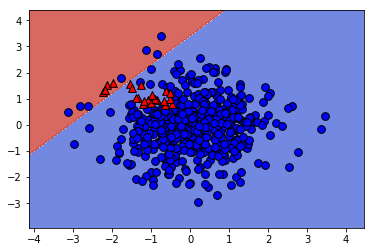

In [57]:
# Print training accuracies
print("Softmax     training accuracy:", lr_mn.score(X_train, y_train))
print("One-vs-rest training accuracy:", lr_ovr.score(X_train, y_train))

# Create the binary classifier (class 1 vs. rest)
lr_class_1 = LogisticRegression(C=100)
lr_class_1.fit(X_train, y_train==1)

# Plot the binary classifier (class 1 vs. rest)
plot_classifier(X_train, y_train==1, lr_class_1)

In [ ]:
# uses the same data

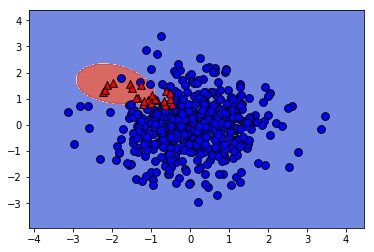

In [59]:
# We'll use SVC instead of LinearSVC from now on
from sklearn.svm import SVC

# Create/plot the binary classifier (class 1 vs. rest)
svm_class_1 = SVC()
svm_class_1.fit(X_train, y_train==1)
plot_classifier(X_train, y_train==1, svm_class_1)